In [67]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
import yfinance as yf
import pandas as pd

# Sélection des paramètres
ticker = input("Entrez le ticker de l'action sous-jacente (par ex. AAPL, MSFT, TSLA) : ").strip().upper()
start_date_experimentation = '2020-01-01'

# Saisie et validation de la date du jour
date_of_day = input("Entrez la date du jour (format : AAAA-MM-JJ) : ").strip()
try:
    date_of_day = pd.to_datetime(date_of_day)  # Convertir la chaîne en objet datetime
except ValueError:
    raise ValueError("Format de date invalide. Veuillez entrer la date au format AAAA-MM-JJ.")

# Paramètres financiers
risk_free_rate = 0.03  # Taux sans risque, 3% dans notre exemple

# Téléchargement des prix
prices = yf.download(ticker, start=start_date_experimentation, end=date_of_day.strftime('%Y-%m-%d'))[['Close']]

# Initialisation de l'objet Ticker
stock = yf.Ticker(ticker)

# Vérification des données
if prices.empty:
    raise ValueError(f"Aucune donnée trouvée pour le ticker {ticker} entre {start_date_experimentation} et {date_of_day.strftime('%Y-%m-%d')}.")

# Affichage des prix
print(f"\nPrix de clôture téléchargés pour {ticker} :")
print(prices.tail())

[*********************100%***********************]  1 of 1 completed


Prix de clôture téléchargés pour AAPL :
                 Close
Date                  
2024-09-30  233.000000
2024-10-01  226.210007
2024-10-02  226.779999
2024-10-03  225.669998
2024-10-04  226.800003


In [70]:
# Obtenez les dates d'expiration disponibles pour les options
expiration_dates = stock.options
if not expiration_dates:
    raise ValueError(f"Aucune option disponible pour le ticker {ticker}.")

In [71]:
# Afficher les dates d'expiration
print(f"\nDates d'expiration disponibles pour {ticker} :")
for i, date in enumerate(expiration_dates):
    print(f"{i + 1}. {date}")


Dates d'expiration disponibles pour AAPL :
1. 2024-12-06
2. 2024-12-13
3. 2024-12-20
4. 2024-12-27
5. 2025-01-03
6. 2025-01-10
7. 2025-01-17
8. 2025-02-21
9. 2025-03-21
10. 2025-04-17
11. 2025-06-20
12. 2025-07-18
13. 2025-08-15
14. 2025-09-19
15. 2025-12-19
16. 2026-01-16
17. 2026-06-18
18. 2026-12-18
19. 2027-01-15


In [72]:
# Choisir une date de maturité
date_choice = int(input(f"\nSélectionnez une date de maturité (1-{len(expiration_dates)}) : ")) - 1
if date_choice < 0 or date_choice >= len(expiration_dates) and expiration_dates[date_choice] > date_of_day:
    raise ValueError("Choix invalide. Veuillez relancer le programme.")

In [73]:
selected_date = expiration_dates[date_choice]
print(f"\nDate de maturité sélectionnée : {selected_date}")


Date de maturité sélectionnée : 2025-01-03


In [74]:
# Récupérer les options Call pour la date sélectionnée
options = stock.option_chain(selected_date).calls
options['expiration_date'] = selected_date  # Ajouter la date d'expiration pour référence

In [75]:
# Sélectionner les colonnes importantes
columns_to_keep = ['contractSymbol', 'expiration_date', 'strike', 'lastPrice', 'bid', 'ask', 'volume', 'openInterest', 'impliedVolatility']
all_calls = options[columns_to_keep]

In [76]:
# Supprimer les lignes avec des données critiques manquantes
all_calls_cleaned = all_calls.dropna(subset=['contractSymbol', 'strike', 'lastPrice'])

In [77]:
# Afficher les options Call propres
print(f"\nOptions Call européennes pour {ticker} à la date de maturité {selected_date} :")
all_calls_cleaned


Options Call européennes pour AAPL à la date de maturité 2025-01-03 :


,contractSymbol,expiration_date,strike,lastPrice,bid,ask,volume,openInterest,impliedVolatility
0,AAPL250103C00145000,2025-01-03,145.0,85.77,95.55,97.40,1.0,1,0.994629
1,AAPL250103C00150000,2025-01-03,150.0,85.64,90.45,92.85,NaN,1,0.716800
2,AAPL250103C00160000,2025-01-03,160.0,73.28,81.60,82.25,NaN,1,0.726565
3,AAPL250103C00170000,2025-01-03,170.0,66.40,70.95,73.05,NaN,6,0.650394
4,AAPL250103C00175000,2025-01-03,175.0,58.56,66.80,68.15,NaN,1,0.685794
5,AAPL250103C00180000,2025-01-03,180.0,55.70,61.75,62.95,NaN,15,0.618168
6,AAPL250103C00185000,2025-01-03,185.0,51.04,56.25,57.80,NaN,5,0.519536
7,AAPL250103C00190000,2025-01-03,190.0,46.73,50.65,52.60,2.0,2,0.554448
8,AAPL250103C00195000,2025-01-03,195.0,36.87,46.75,48.05,NaN,3,0.551030
9,AAPL250103C00200000,2025-01-03,200.0,42.15,42.30,43.05,1.0,18,0.500737


In [ ]:
# Fonction simulation Monte Carlo
def MonteCarloSimulation(ticker, prices, nb_simulation, nb_step, initial_date, initial_price, mean, std, risk_free_rate, strike_price, option_type):
    dates = pd.date_range(start=initial_date, periods=nb_step + 1, freq='B')
    simulations = np.zeros((nb_simulation, nb_step + 1))

    for i in range(nb_simulation):
        random_walk = np.random.normal(mean, std, nb_step)
        simulations[i, :] = initial_price * np.exp(np.cumsum(np.insert(random_walk, 0, 0)))

    # Calcul des prix finaux
    final_prices = simulations[:, -1]

    # Calcul du prix justes
    mean_final_price = np.mean(final_prices)
    t = (dates[-1] - dates[0]).days / 365
    fair_price = mean_final_price * np.exp(-risk_free_rate * t)

    # Calculer les payoffs pour l'option
    if option_type.lower() == 'call':
        payoffs = np.maximum(0, final_prices - strike_price)  # Payoff pour un Call
    elif option_type.lower() == 'put':
        payoffs = np.maximum(0, strike_price - final_prices)  # Payoff pour un Put
    else:
        raise ValueError("Le type d'option doit être 'call' ou 'put'.")

    plt.figure(figsize=(12, 8))
    plt.plot(prices.index, prices['Close'], color='red', linewidth=2, label=f'Historique des prix de {ticker}')
    plt.scatter(initial_date, initial_price, color='black', zorder=3)

    # Tracer un sous-ensemble des simulations
    for i in range(min(nb_simulation, 10)):  # Limite à 10 traces
        plt.plot(dates, simulations[i, :], linewidth=1, alpha=0.6)

    plt.title(f"Simulation Monte Carlo pour {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Prix")
    plt.legend()
    plt.grid()
    plt.show()

In [79]:
import numpy as np
import pandas as pd
import holidays

# Date de début et de fin
date_of_day = pd.to_datetime(date_of_day).date()
selected_date = pd.to_datetime(selected_date).date()

# Liste des jours fériés pour les États-Unis en 2023-2024
us_holidays = holidays.UnitedStates(years=[2023, 2024])
holiday_dates = np.array([np.datetime64(date, 'D') for date in us_holidays.keys()])

# Calcul avec jours fériés dynamiques
nb_days = np.busday_count(date_of_day, selected_date, holidays=holiday_dates)

# Affichage du résultat
print(f"Nombre de jours ouvrables (hors jours fériés) entre {date_of_day} et {selected_date} : {nb_days}")

Nombre de jours ouvrables (hors jours fériés) entre 2024-10-05 et 2025-01-03 : 60


In [80]:
# Calcul des rendements logarithmiques
returns = np.log(prices['Close']).diff().dropna()
mean_return = returns.mean()
std_return = returns.std()

C:\Users\cleme\AppData\Local\Temp\ipykernel_19656\2396390652.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fair_price = MonteCarloSimulation(ticker, prices, nb_simulation=100, nb_step=nb_days, initial_date=date_of_day, initial_price=prices['Close'][-1], mean=mean_return, std=std_return, risk_free_rate=risk_free_rate)


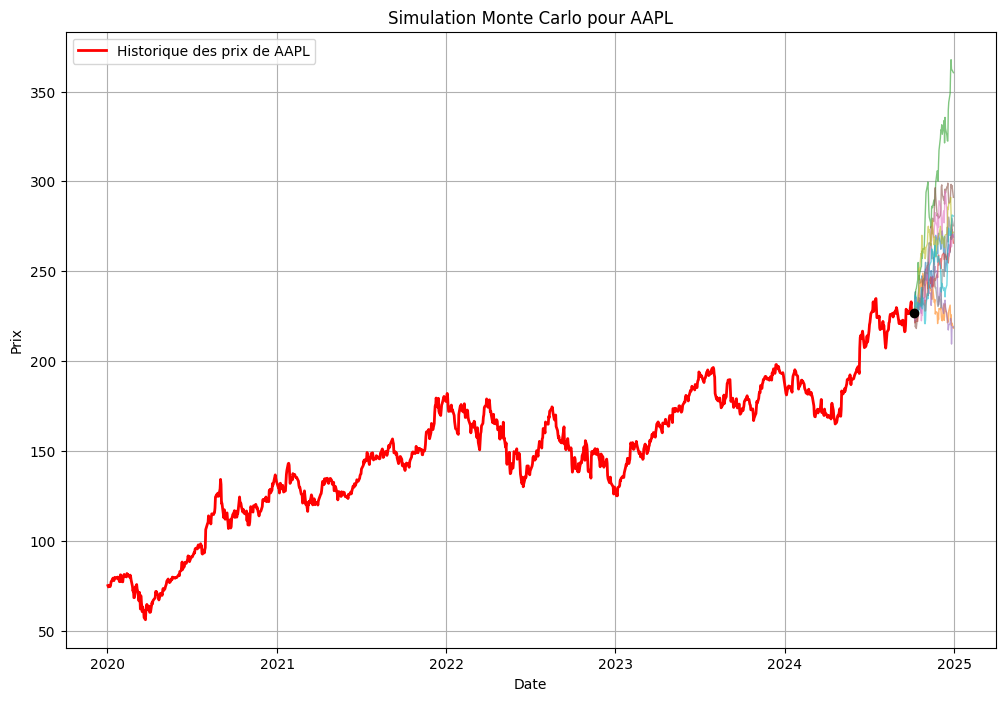

Le prix équitable estimé est de 247.98


In [ ]:
# Lancer la simulation
MonteCarloSimulation(ticker, prices, nb_simulation=100, nb_step=nb_days, initial_date=date_of_day, initial_price=prices['Close'][-1], mean=mean_return, std=std_return, risk_free_rate=risk_free_rate)